In [40]:
# For this problem set, I worked with ...

In [41]:
# PROBLEM 1 -

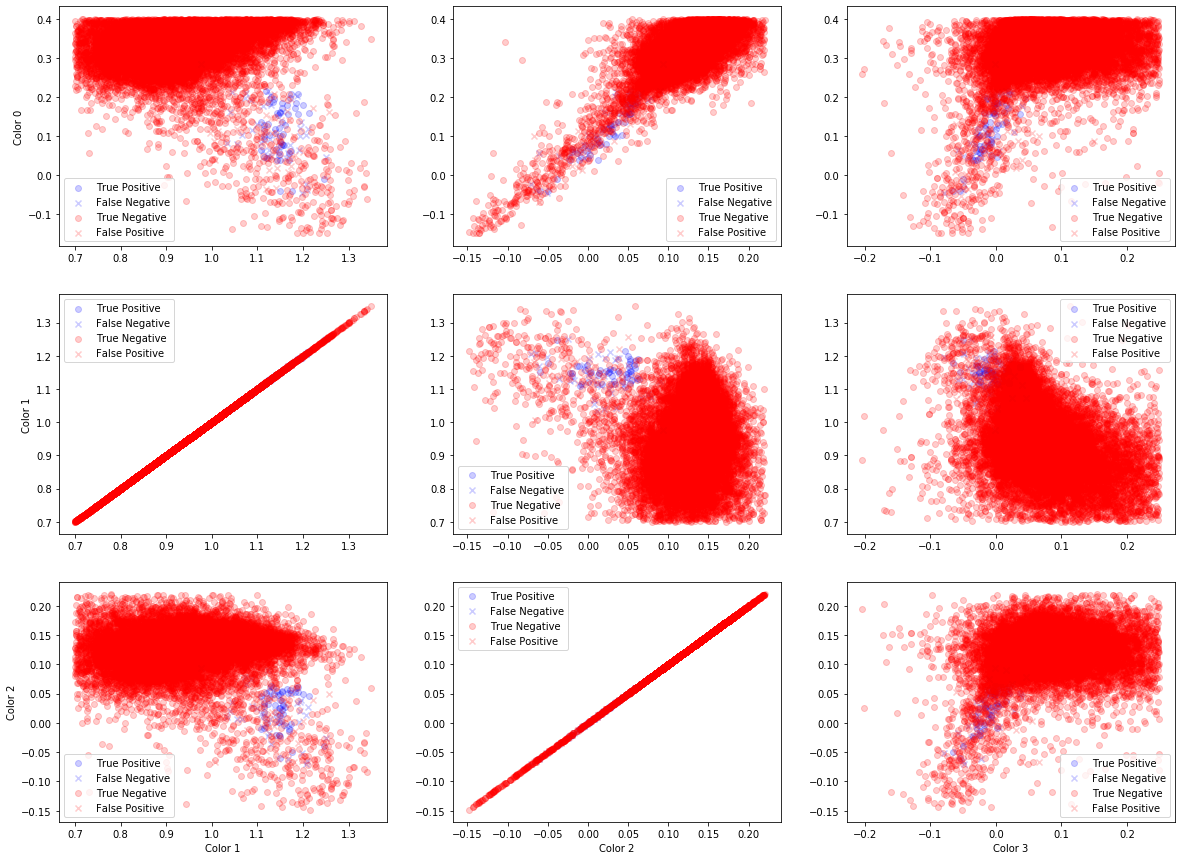

In [45]:

# To import general packages ...
import numpy as np
import math
import matplotlib.pyplot as plt
# To import packages specfic to this project ...
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


# 'p' stands for 'prediction'; 'r' stands for 'reality'...
# 'tp' = True Positive, 'tn' = True Negative, 'fp' = False Positive, 'fn' = False Negative


# To evaluate the performance of the classification model via summary of prediction results ...
def confusion_matrix(p,r):
    # To initialize table positions ...
    tp_sum = 0
    tn_sum = 0
    fp_sum = 0
    fn_sum = 0
    p_len = len(p)
    
    for i in range(p_len):
        r_value = r[i]
        p_value = p[i]
        
        # Set of 'if' statements...
        # '0' = is NOT an RRLyra, '1' = IS an RRLyra*...
        if (r_value==1):
            if (r_value==p_value):
                tp_sum = tp_sum + 1
            elif (r_value!=p_value):
                fn_sum = fn_sum + 1
                
        elif (r_value==0):
            if (r_value==p_value):
                tn_sum = tn_sum + 1
            elif (r_value!=p_value):
                fp_sum = fp_sum + 1
    
    return([tp_sum, fn_sum, fp_sum, tn_sum])


# For the specific indices ... 
def confusion_matrix_indices(p,r):
    tp_i = []
    tn_i = []
    fp_i = []
    fn_i = []
    p_len = len(p)
    
    for j in range(p_len):
        r_value = r[j]
        p_value = p[j]
        
        # 'if' statements to append to the indices lists...
        if (r_value==1):
            if (r_value==p_value):
                tp_i.append(j)
            elif (r_value!=p_value):
                fn_i.append(j)
        elif (r_value==0):
            if (r_value==p_value):
                tn_i.append(j)
            elif (r_value!=p_value):
                fp_i.append(j)
                
    # ~~~~~
    return(tp_i, fn_i, fp_i, tn_i)



# To load the data from each text file ...
x = np.genfromtxt("RRLyrae_features.txt", delimiter=',')
y = np.genfromtxt("RRLyrae_labels.txt")

# Technique to cross-validate the model (specifically provides train/test indices to splot data in each train/test set*) ... 
# Divides the data set into k-folds ... 
# Shuffle=True means splitting at random ... 
kf = KFold(5,shuffle=True)
x_train_li = []
y_train_li = []
x_test_li = []
y_test_li = []


for train_i, test_i in kf.split(x,y):
    
    x_train = x[train_i]
    y_train = y[train_i]
    
    x_test = x[test_i]
    y_test = y[test_i]
    
    x_train_li.append(x_train)
    y_train_li.append(y_train)
    
    x_test_li.append(x_test)
    y_test_li.append(y_test)
    

# To measure the quality of the split and record this information ... 
score_list = []
dtc = DecisionTreeClassifier()
conflists = []

x_train_li_len = len(x_train_li)
for i in range(x_train_li_len):
    # To take the training data as arguments - two arrays because we're conducting supervised 
    # learning here ...
    # To adjust the weight according to data values so achieve better accuracy ... 
    dtc = dtc.fit(x_train_li[i],y_train_li[i])
    score = dtc.score(x_test_li[i],y_test_li[i])
    y_p = dtc.predict(x_test_li[i])
    y_r = y_test_li[i]
    conflist = confusion_matrix(y_p, y_r)
    conflists.append(conflist)
    score_list.append(score)
    
    
# To take the dataset and apply the cross validation to split thedata and train the model
# using the estimator ... 
scoresalt = cross_val_score(DecisionTreeClassifier(), x, y, cv=5)


dtc = DecisionTreeClassifier()
i = 0
dtc= dtc.fit(x_train_li[i],y_train_li[i])
score = dtc.score(x_test_li[i],y_test_li[i])
y_p = dtc.predict(x_test_li[i])
y_r = y_test_li[i]

x_test = x_test_li[i]
x0 = x_test[:,0]
x1 = x_test[:,1]
x2 = x_test[:,2]
x3 = x_test[:,3]



# TO BEGIN TO ACTUALLY PLOT ...

# 'x' = Falsely Predicted
# 'o' = Correctly Rredicted
# 'blue' = (RRLyra = True)
# 'red' = (RRLyra = False)


# To design the figures to be in a 3x3 organization ... 
fig,axs=plt.subplots(3,3)
fig.set_figheight(15)
fig.set_figwidth(20)



y_tp_i, y_fn_i, y_fp_i, y_tn_i = confusion_matrix_indices(y_p, y_r)

x0_tp = x0[y_tp_i]
x0_fn = x0[y_fn_i]
x0_fp = x0[y_fp_i]
x0_tn = x0[y_tn_i]

x1_tp = x1[y_tp_i]
x1_fn = x1[y_fn_i]
x1_fp = x1[y_fp_i]
x1_tn = x1[y_tn_i]

x2_tp = x2[y_tp_i]
x2_fn = x2[y_fn_i]
x2_fp = x2[y_fp_i]
x2_tn = x2[y_tn_i]

x3_tp = x3[y_tp_i]
x3_fn = x3[y_fn_i]
x3_fp = x3[y_fp_i]
x3_tn = x3[y_tn_i]


# To reshape my arrays without changing data ... 
datatp=np.append(x0_tp.reshape(-1,1),x1_tp.reshape(-1,1),axis=1)
datatp=np.append(datatp,x2_tp.reshape(-1,1),axis=1)
datatp=np.append(datatp,x3_tp.reshape(-1,1),axis=1)

datatn=np.append(x0_tn.reshape(-1,1),x1_tn.reshape(-1,1),axis=1)
datatn=np.append(datatn,x2_tn.reshape(-1,1),axis=1)
datatn=np.append(datatn,x3_tn.reshape(-1,1),axis=1)

datafp=np.append(x0_fp.reshape(-1,1),x1_fp.reshape(-1,1),axis=1)
datafp=np.append(datafp,x2_fp.reshape(-1,1),axis=1)
datafp=np.append(datafp,x3_fp.reshape(-1,1),axis=1)

datafn=np.append(x0_fn.reshape(-1,1),x1_fn.reshape(-1,1),axis=1)
datafn=np.append(datafn,x2_fn.reshape(-1,1),axis=1)
datafn=np.append(datafn,x3_fn.reshape(-1,1),axis=1)


# Setting / specifying graph details for each of the nine graphs ... 
axs[0,0].scatter(x1_tp, x0_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[0,0].scatter(x1_fn, x0_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[0,0].scatter(x1_tn, x0_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[0,0].scatter(x1_fp, x0_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[0,0].set(ylabel='Color 0')
axs[0,0].legend()

axs[0,1].scatter(x2_tp, x0_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[0,1].scatter(x2_fn, x0_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[0,1].scatter(x2_tn, x0_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[0,1].scatter(x2_fp, x0_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[0,1].legend()

axs[0,2].scatter(x3_tp, x0_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[0,2].scatter(x3_fn, x0_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[0,2].scatter(x3_tn, x0_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[0,2].scatter(x3_fp, x0_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[0,2].legend()

axs[1,0].scatter(x1_tp, x1_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[1,0].scatter(x1_fn, x1_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[1,0].scatter(x1_tn, x1_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[1,0].scatter(x1_fp, x1_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[1,0].set(ylabel='Color 1')
axs[1,0].legend()

axs[1,1].scatter(x2_tp, x1_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[1,1].scatter(x2_fn, x1_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[1,1].scatter(x2_tn, x1_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[1,1].scatter(x2_fp, x1_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[1,1].legend()

axs[1,2].scatter(x3_tp, x1_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[1,2].scatter(x3_fn, x1_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[1,2].scatter(x3_tn, x1_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[1,2].scatter(x3_fp, x1_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[1,2].legend()

axs[2,0].scatter(x1_tp, x2_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[2,0].scatter(x1_fn, x2_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[2,0].scatter(x1_tn, x2_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[2,0].scatter(x1_fp, x2_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[2,0].set(ylabel='Color 2',xlabel='Color 1')
axs[2,0].legend()

axs[2,1].scatter(x2_tp, x2_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[2,1].scatter(x2_fn, x2_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[2,1].scatter(x2_tn, x2_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[2,1].scatter(x2_fp, x2_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[2,1].set(xlabel='Color 2')
axs[2,1].legend()

axs[2,2].scatter(x3_tp, x2_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[2,2].scatter(x3_fn, x2_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[2,2].scatter(x3_tn, x2_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[2,2].scatter(x3_fp, x2_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[2,2].set(xlabel='Color 3')
axs[2,2].legend()



In [43]:
# PROBLEM 2 - 

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

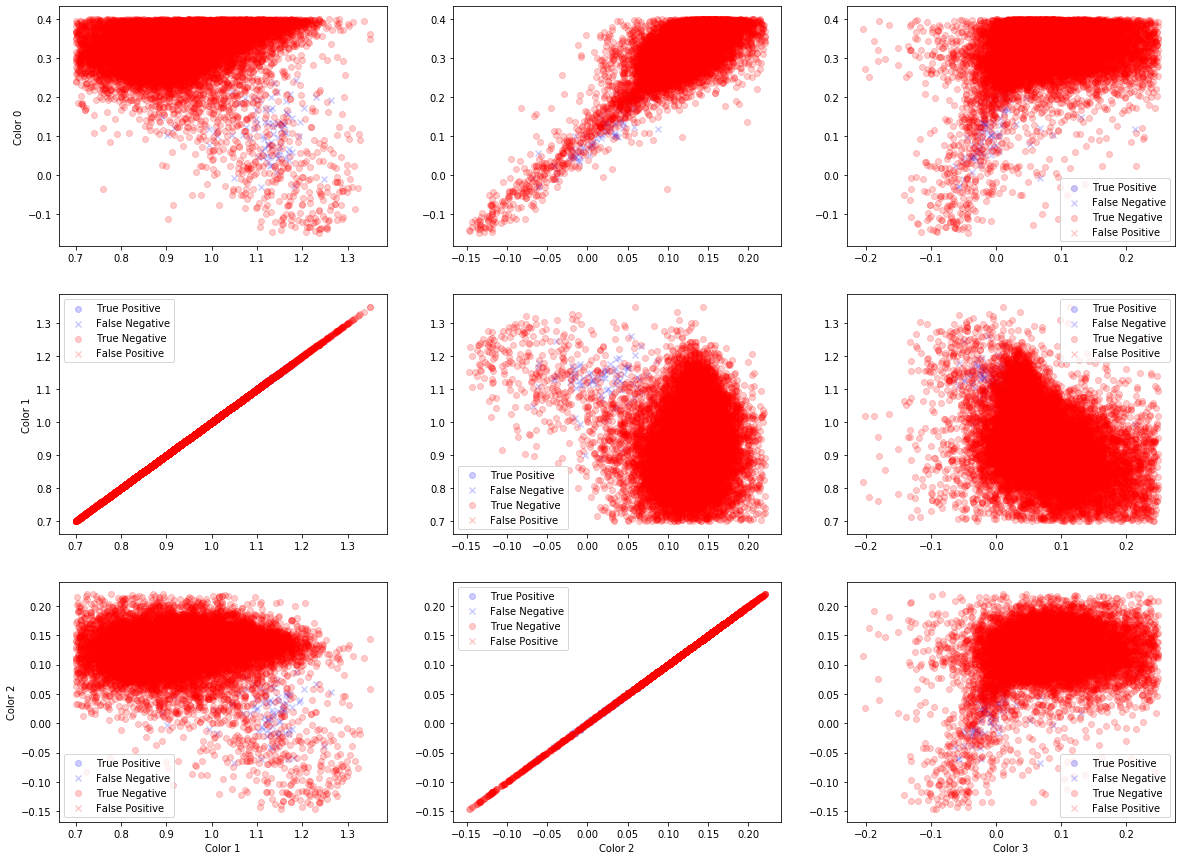

In [44]:
# To import general necessary packages ... 
import numpy as np
import math
import matplotlib.pyplot as plt
# To import packages specfic to this project ...
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# The following two functions were defined in Problem 1* ...
def confusion_matrix(p,r):
    p_len = len(p)
    tp_sum = 0
    tn_sum = 0
    fp_sum = 0
    fn_sum = 0
    for i in range(p_len):
        r_value = r[i]
        p_value = p[i]
        if (r_value==0):
            if (r_value==p_value):
                tn_sum = tn_sum + 1
            elif (r_value!=p_value):
                fp_sum = fp_sum + 1
        elif (r_value==1):
            if (r_value==p_value):
                tp_sum = tp_sum + 1
            elif (r_value!=p_value):
                fn_sum = fn_sum + 1
    
    return([tp_sum, fn_sum, fp_sum, tn_sum])


def confusion_matrix_indices(p,r):
    p_len = len(p)
    tp_i = []
    tn_i = []
    fp_i = []
    fn_i = []
    for j in range(p_len):
        r_value = r[j]
        p_value = p[j]
        if (r_value==0):
            if (r_value==p_value):
                tn_i.append(j)
            elif (r_value!=p_value):
                fp_i.append(j)
        elif (r_value==1):
            if (r_value==p_value):
                tp_i.append(j)
            elif (r_value!=p_value):
                fn_i.append(j)
    return(tp_i, fn_i, fp_i, tn_i)


# ~~~BELOW IS SIMILAR TOO .. BUT UP TO WHAT POINT ??~~~
x = np.genfromtxt("RRLyrae_features.txt", delimiter=',')
y = np.genfromtxt("RRLyrae_labels.txt")


kf = KFold(5, shuffle=True)
x_train_li = []
y_train_li = []
x_test_li = []
y_test_li = []


for train_i, test_i in kf.split(x,y):
    x_train = x[train_i]
    y_train = y[train_i]
    x_test = x[test_i]
    y_test = y[test_i]
    x_train_li.append(x_train)
    y_train_li.append(y_train)
    x_test_li.append(x_test)
    y_test_li.append(y_test)

    
score_list=[]
clf = SVC()
conflists=[]
x_train_li_len = len(x_train_li)
for i in range(x_train_li_len):
    clf = clf.fit(x_train_li[i],y_train_li[i])
    score = clf.score(x_test_li[i],y_test_li[i])
    y_p = clf.predict(x_test_li[i])
    y_r = y_test_li[i]
    conflist = confusion_matrix(y_p, y_r)
    conflists.append(conflist)
    scorelist.append(score)
 
# Support Vector Classifier to fit the data retuning a best fit ... 
clf = SVC()
scores_alt = cross_val_score(clf, x, y, cv=5)
# pretty bad, lets try again with weights

w_clf = SVC(class_weight={1:10})
score_list_w=[]
conflists_w=[]
x_train_li_len = len(x_train_li)
for i in range(x_train_li_len):
    w_clf = w_clf.fit(x_train_li[i],y_train_li[i])
    score = w_clf.score(x_test_li[i],y_test_li[i])
    y_p = w_clf.predict(x_test_li[i])
    y_r = y_test_li[i]
    conflist = confusion_matrix(y_p, y_r)
    conflists_w.append(conflist)
    score_list_w.append(score)



i = 0
w_clf = SVC(class_weight={1:5})
w_clf = w_clf.fit(x_train_li[i],y_train_li[i])
score = w_clf.score(x_test_li[i],y_test_li[i])
y_p = w_clf.predict(x_test_li[i])
y_r = y_test_li[i]

x_test = x_test_li[i]
x0 = x_test[:,0]
x1 = x_test[:,1]
x2 = x_test[:,2]
x3 = x_test[:,3]


# TO ACTUALLY BEGIN TO PLOT ...

# To design the figures to be in a 3x3 organization ... 
fig,axs=plt.subplots(3,3)
fig.set_figheight(15)
fig.set_figwidth(20)


y_tp_i, y_fn_i, y_fp_i, y_tn_i=confusion_matrix_indices(y_p, y_r)


x0_tp = x0[y_tp_i]
x0_fn = x0[y_fn_i]
x0_fp = x0[y_fp_i]
x0_tn = x0[y_tn_i]

x1_tp = x1[y_tp_i]
x1_fn = x1[y_fn_i]
x1_fp = x1[y_fp_i]
x1_tn = x1[y_tn_i]

x2_tp = x2[y_tp_i]
x2_fn = x2[y_fn_i]
x2_fp = x2[y_fp_i]
x2_tn = x2[y_tn_i]

x3_tp = x3[y_tp_i]
x3_fn = x3[y_fn_i]
x3_fp = x3[y_fp_i]
x3_tn = x3[y_tn_i]

# To reshape my arrays without changing data ... 
datatp=np.append(x0_tp.reshape(-1,1),x1_tp.reshape(-1,1),axis=1)
datatp=np.append(datatp,x2_tp.reshape(-1,1),axis=1)
datatp=np.append(datatp,x3_tp.reshape(-1,1),axis=1)

datatn=np.append(x0_tn.reshape(-1,1),x1_tn.reshape(-1,1),axis=1)
datatn=np.append(datatn,x2_tn.reshape(-1,1),axis=1)
datatn=np.append(datatn,x3_tn.reshape(-1,1),axis=1)

datafp=np.append(x0_fp.reshape(-1,1),x1_fp.reshape(-1,1),axis=1)
datafp=np.append(datafp,x2_fp.reshape(-1,1),axis=1)
datafp=np.append(datafp,x3_fp.reshape(-1,1),axis=1)

datafn=np.append(x0_fn.reshape(-1,1),x1_fn.reshape(-1,1),axis=1)
datafn=np.append(datafn,x2_fn.reshape(-1,1),axis=1)
datafn=np.append(datafn,x3_fn.reshape(-1,1),axis=1)

# Again ...
# 'x' = Falsely Predicted
# 'o' = Correctly Rredicted
# 'blue' = (RRLyra = True)
# 'red' = (RRLyra = False)


# Setting / specifying graph details for each of the nine graphs ... 
axs[0,0].scatter(x1_tp, x0_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[0,0].scatter(x1_fn, x0_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[0,0].scatter(x1_tn, x0_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[0,0].scatter(x1_fp, x0_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[0,0].set(ylabel='Color 0')
axs[0,2].legend()

axs[0,1].scatter(x2_tp, x0_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[0,1].scatter(x2_fn, x0_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[0,1].scatter(x2_tn, x0_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[0,1].scatter(x2_fp, x0_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[0,2].legend()

axs[0,2].scatter(x3_tp, x0_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[0,2].scatter(x3_fn, x0_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[0,2].scatter(x3_tn, x0_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[0,2].scatter(x3_fp, x0_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[0,2].legend()

axs[1,0].scatter(x1_tp, x1_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[1,0].scatter(x1_fn, x1_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[1,0].scatter(x1_tn, x1_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[1,0].scatter(x1_fp, x1_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[1,0].set(ylabel='Color 1')
axs[1,0].legend()

axs[1,1].scatter(x2_tp, x1_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[1,1].scatter(x2_fn, x1_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[1,1].scatter(x2_tn, x1_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[1,1].scatter(x2_fp, x1_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[1,1].legend()

axs[1,2].scatter(x3_tp, x1_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[1,2].scatter(x3_fn, x1_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[1,2].scatter(x3_tn, x1_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[1,2].scatter(x3_fp, x1_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[1,2].legend()

axs[2,0].scatter(x1_tp, x2_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[2,0].scatter(x1_fn, x2_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[2,0].scatter(x1_tn, x2_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[2,0].scatter(x1_fp, x2_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[2,0].set(ylabel='Color 2',xlabel='Color 1')
axs[2,0].legend()

axs[2,1].scatter(x2_tp, x2_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[2,1].scatter(x2_fn, x2_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[2,1].scatter(x2_tn, x2_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[2,1].scatter(x2_fp, x2_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[2,1].set(xlabel='Color 2')
axs[2,1].legend()

axs[2,2].scatter(x3_tp, x2_tp, color='blue', marker='o', label='True Positive',alpha=0.2)
axs[2,2].scatter(x3_fn, x2_fn, color='blue', marker='x', label='False Negative',alpha=0.2)
axs[2,2].scatter(x3_tn, x2_tn, color='red', marker='o', label='True Negative',alpha=0.2)
axs[2,2].scatter(x3_fp, x2_fp, color='red', marker='x', label='False Positive',alpha=0.2)
axs[2,2].set(xlabel='Color 3')
axs[2,2].legend()


# My thoughts about my work above ... 
# We are able to observe that the decision tree is working decently; beyond operating a lot 
# better than the unweighted SVC, the success of the decision tree really becomes clear when 
# we weight the SVC. To reiterate, the aim for this assignment was to increase the number of 
# tre positives (and thus decrease the number of false negatives) - here, the number of false 
# positives is alright as we are allowed to review them; however, the false negatives are 
# severly hidden...